# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): Gradient boosting
### <center>Predict whether income exceeds $50K/yr based on census data.

Link: https://www.kaggle.com/mattmet/income-prediction-xgboost-accuracy-86-02

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model  import LogisticRegression
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from xgboost               import XGBClassifier, plot_tree
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics         import accuracy_score, balanced_accuracy_score
from IPython.display import clear_output

# Leer CSV

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../../Datasets/Tabular/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/Datasets/Tabular/adult.csv

In [3]:
df = pd.read_csv("../../Datasets/Tabular/adult.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Qué queremos predecir? -> `df.income`

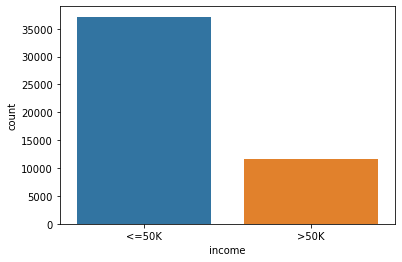

In [5]:
sb.countplot(df.income);

# Variables

In [6]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object]).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)


Numerical features:
 ['age' 'fnlwgt' 'educational-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country' 'income']


# Categorical

In [7]:
df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


# Models

In [8]:
x = df.drop("income", axis="columns")
y = df["income"]

In [9]:
models = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1)),
    ('Decision Tree',       DecisionTreeClassifier()),
    ('Extra Trees 100',         ExtraTreesClassifier(n_jobs=-1)),
    ('Random Forest 100',       RandomForestClassifier(n_jobs=-1)),
    ('Gradient Boosting 100',   GradientBoostingClassifier()),
    ('XGBoost 100',             XGBClassifier(n_estimators=100)),
    ('LightGBM 100',            LGBMClassifier(n_estimators=100)),
    ('CatBoost 100',            CatBoostClassifier(n_estimators=100, logging_level="Silent")), # Por defecto son 1000
    #('XGBoost 250',             XGBClassifier(n_estimators=250))
]

results = pd.DataFrame(columns=["Accuracy", "Bal Acc"])

for model_name, model in models:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    pred_oof     = cross_val_predict(model, x, y, cv=skf)
    predProb_oof = cross_val_predict(model, x, y, cv=skf, method="predict_proba")
    #cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy')
    
    acc     = accuracy_score(y, pred_oof)*100
    bal_acc = balanced_accuracy_score(y, pred_oof)*100
    
    results.loc[model_name] = [acc, bal_acc]
    clear_output(wait=True)
    display(results.style.bar(subset=["Accuracy", "Bal Acc"], vmin=0, vmax=100, color='#5fba7d'))
    
    #print("%s: %.2f%%" % (model_name, balanced_accuracy_score(y, pred_oof)*100))
    #print("%s: %.2f%% (%.2f%%)" % (model_name, cv_r.mean()*100, cv_r.std()*100))

,Accuracy,Bal Acc
Logistic Regression,79.237132,61.828250
Decision Tree,80.971295,74.375666
Extra Trees 100,84.374104,76.357111
Random Forest 100,85.666025,77.484848
Gradient Boosting 100,86.646738,77.466690
XGBoost 100,87.263011,79.889340
LightGBM 100,87.451374,79.898777
CatBoost 100,87.238442,79.606330


In [22]:
results.style.bar(subset=["Accuracy", "Bal Acc"], vmin=50, vmax=100, color='#5fba7d')

,Accuracy,Bal Acc
Logistic Regression,79.237132,61.828250
Decision Tree,80.971295,74.375666
Extra Trees 100,84.374104,76.357111
Random Forest 100,85.666025,77.484848
Gradient Boosting 100,86.646738,77.466690
XGBoost 100,87.263011,79.889340
LightGBM 100,87.451374,79.898777
CatBoost 100,87.238442,79.606330


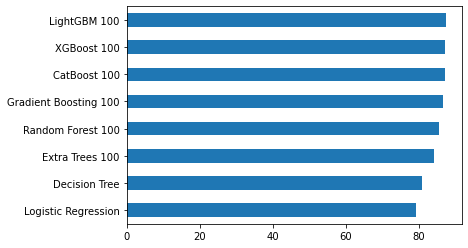

In [19]:
results.Accuracy.sort_values().plot.barh();

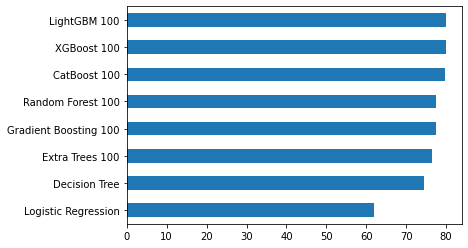

In [20]:
results["Bal Acc"].sort_values().plot.barh();

<AxesSubplot:>

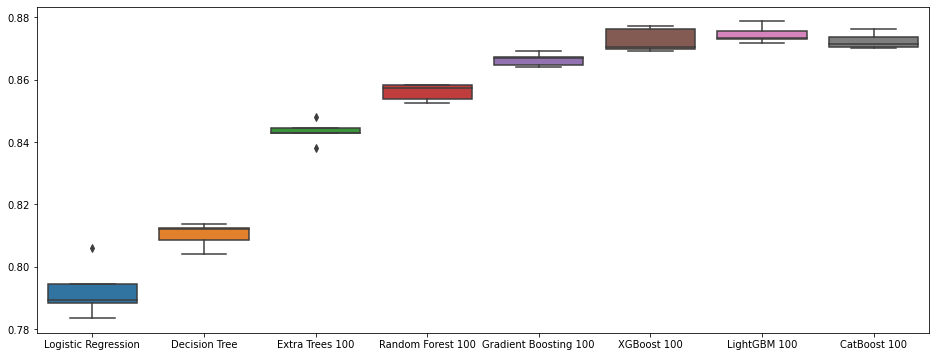

In [13]:
results ={'Names': Modelnames,'Results': outcome}
plt.figure(figsize=(16,6))
sb.boxplot(x='Names',y='Results',data=results)

In [13]:
models = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1)),
    ('Decision Tree',       DecisionTreeClassifier()),
    ('Extra Trees 100',         ExtraTreesClassifier(n_jobs=-1)),
    ('Random Forest 100',       RandomForestClassifier(n_jobs=-1)),
    ('Gradient Boosting 100',   GradientBoostingClassifier()),
    ('XGBoost 100',             XGBClassifier(n_estimators=100)),
    ('LightGBM 100',            LGBMClassifier(n_estimators=100)),
    ('CatBoost 100',            CatBoostClassifier(n_estimators=100)), # Por defecto son 1000
    #('XGBoost 250',             XGBClassifier(n_estimators=250))
]

preds_oof  = []
predsProb_oof = []
model_names = []

for model_name, model in models:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    pred_oof     = cross_val_predict(model, x, y, cv=skf)
    predProb_oof = cross_val_predict(model, x, y, cv=skf, method=’predict_proba’)
    #cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy')
    
    preds_oof.append(pred_oof)
    predsProb_oof.append(predProb_oof)
    model_names.append(model_name)
    
    print("%s: %.2f%%" % (model_name, balanced_accuracy_score(y, preds_oof)*100))
    #print("%s: %.2f%% (%.2f%%)" % (model_name, cv_r.mean()*100, cv_r.std()*100))

Logistic Regression: 78.99% (0.63%)
Decision Tree: 81.23% (0.40%)
Extra Trees: 84.57% (0.30%)
Random Forest: 85.67% (0.26%)
Gradient Boosting: 86.56% (0.35%)
XGBoost: 87.03% (0.41%)


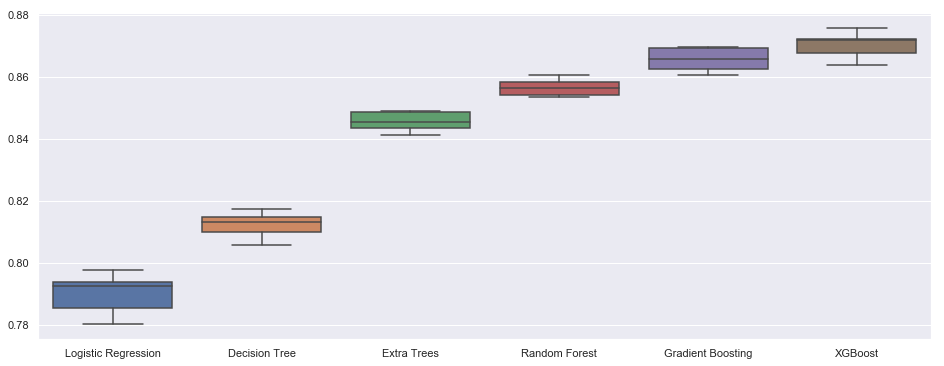

In [14]:
results ={'Names': Modelnames,'Results': outcome}
plt.figure(figsize=(16,6))
sns.boxplot(x='Names',y='Results',data=results)